<a href="https://colab.research.google.com/github/jinsu1214/class2022spring/blob/main/20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root mean square(rms)  
rms는 2차 평균이라고도 불리는데 이는 숫자들을 제곱한 것에 대한 산술 평균을 제곱근 한 것이다.  
오디오나 스펙ㅌ트로그램에서 각 프레임 별로 rms를 계산하여 사용한다.  
오디오 샘플에서 rms를 사용하면 이는 STFT를 계산하지 않아도 되기 때문에 속도적인 측면에서 장점을 가지게 된다. 스펙토르그램을 사용하게 되면 프레임이 형성되는데 이는 시간축에 따라서 에너지가 어떻게 변화하는지를 나타내는 것에 효과적이다. 


In [4]:
import librosa, librosa.display
import matplotlib.pyplot as plt

In [5]:
y, sr = librosa.load(librosa.ex('trumpet'))
rms = librosa.feature.rms(y=y)

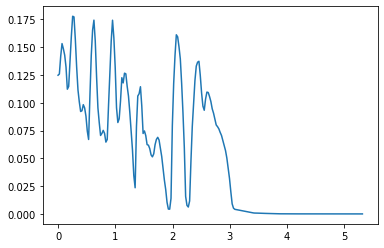

In [6]:
times = librosa.times_like(rms)
plt.plot(times,rms[0])

이렇게 waveform의 envelope를 구하고 일치하는지를 확인할 수 있다. 또한 내가 위에서 악기로 trumpet을 설정했듯이 악기의 종류를 확인할 수 있고 또한 이 rms를 사용하여 음량 또한 알아볼 수 있다고 한다.

Auto correlation

auto correlation은 signal과 그것을 미룬 것과 비교할 때 사용된다. 만약 signal이 주기적이고 미루어진 signal이 정수라면 원래의 것과완벽하게 상관관계를 이룰 것이다.  
auto correlation을 사용하는 방법은 시간 t에 있는 signal값과 이것을 뒤로 미룬 signal, 즉 t+a 에서의 신호의 값을 찾은 다음 두 값을 곱한다. 이 과정을 모든 t값에서 실행한 다음에 이것의 평균을 계산하면 된다.  
만약 t=0에서 autocorrelation의 진폭이 1이 되면 더 편리하게 사용할 수 있다. 왜냐면 이는 원래의 signal과 자신과 완전히 같은 copy와 비교하고 있기에 완벽하게 상관관계에 있다라고 말할 수 있기 때문이다.

In [11]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

0

In [15]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [16]:
x, sr = librosa.load('aeiou.wav')
ipd.Audio(x, rate=sr)

In [17]:
r = librosa.autocorrelate(x, max_size=10000)
print(r.shape)

(10000,)


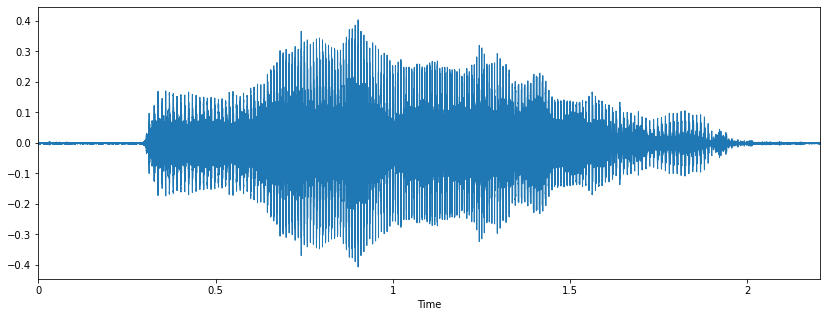

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

이런 식으로 auto correlation을 사용할 수 있고 이는 signal에서 반복적으로 등장하는 패턴을 찾을 필요가 있을 때 사용한다고 한다. 딜레이 된 것에서 이것을 사용하면 signal의 기본 주파수를 알려주기도 하고 소리의 템포에 대해서 알려주기도 한다.

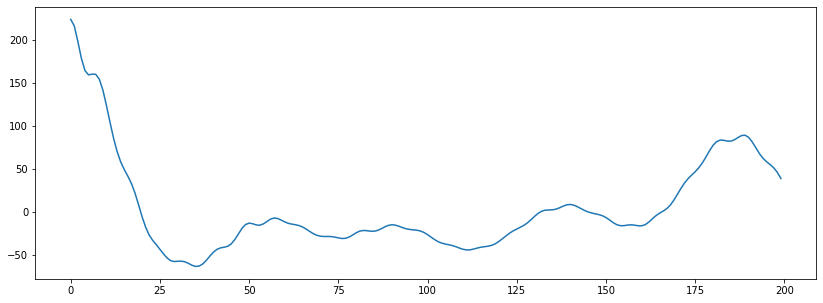

In [21]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])

In [22]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

In [23]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0

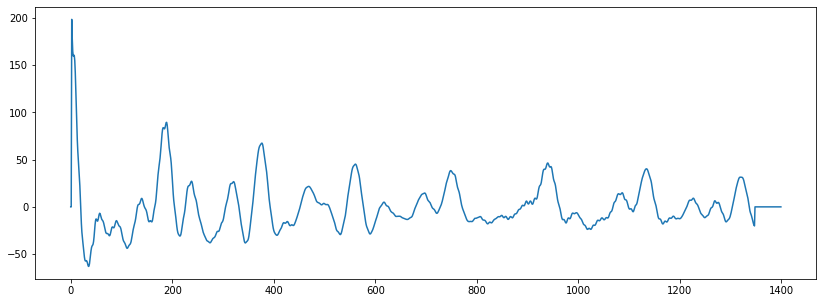

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

In [25]:
t_max = r.argmax()
print(t_max)

2


In [26]:
float(sr)/t_max

11025.0

In [27]:
librosa.midi_to_hz(84)

1046.5022612023945

이런 식으로 auto correlation을 사용하여 신호 내에서 반복되는 패턴을 찾을 때 사용하고 여기서 반복되는 패턴이라는 것은 pitch의 주기이기 때문에 pitch의 주기를 찾는데 사용한다.  
그 방법은 auto correlation을 계산한 후에 plot을 해주고 auto correlation은 0을 최대로 갖기에 0을 기준으로 해서 최대 위치를 찾고pitch를 Hz 단위로 추정할 수도 있다. 그리고 그것에 대한 주파수도 알아볼 수 있다.